In [65]:
import requests
from PIL import Image
import io
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

/Users/nikhilkuria/Dev/git/workbooks/_env/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [74]:
# Interesting Links
# - http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html
# - https://en.wikipedia.org/wiki/Kernel_(image_processing) (Useful image kernels)
# - http://scikit-image.org/docs/dev/user_guide/numpy_images.html (Numpy images)

In [3]:
UNSPLASH_RANDOM_API = "https://source.unsplash.com/random"

In [34]:
SHARPEN_KERNEL = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [28]:
image_response = requests.get(UNSPLASH_RANDOM_API)
if image_response.status_code != 200:
    print("Something went wrong with the image request")

(720, 1080)


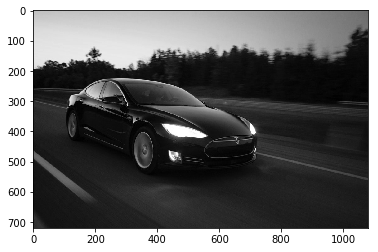

In [99]:
image_data = image_response.content
image = Image.open(io.BytesIO(image_data)).convert(mode='L')

# Create a vector from the images
image_vector = np.array(image)
print(image_vector.shape)

plt.imshow(image_vector, cmap="gray", aspect='auto')

In [107]:
def convolve_image(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()   
    return output

In [108]:
convolved_image = convolve_image(image_vector,SHARPEN_KERNEL)

(720, 1080)


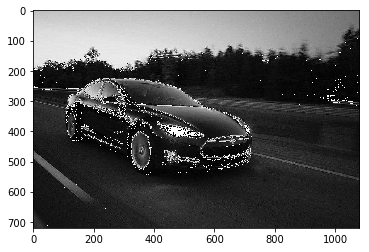

In [109]:
print(convolved_image.shape)
plt.imshow(convolved_image, cmap="gray")